### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

## Základný opis dát spolu s ich charakteristikami

### Measurements.csv

In [98]:
measurements = pd.read_csv("data/measurements.csv", delim_whitespace=True)
measurements.head(10)

,CH4,CFCs,Pb,PRES,C2H3NO5,PM2.5,warning,PAHs,NH3,longitude,CO,H2CO,PM10,TEMP,SO2,NOx,latitude,O3
0,7.44130,54.87439,42.36785,1118.19032,3.48524,8.37187,0.00000,7.02228,8.07471,-81.24441,9.08188,60.40440,7.36412,9.39019,8.88459,5.38755,23.15678,10.20220
1,7.64220,64.13209,37.07811,1134.16855,3.45157,10.00709,1.00000,5.68240,7.49355,9.85000,6.37520,61.26790,6.57565,11.56947,5.95930,7.54852,53.63333,10.89267
2,41.31320,29.31346,1094.55929,8.66360,9.45829,0.00000,7.44533,8.51808,42.54536,9.06753,53.78254,8.51395,31.09956,6.91440,4.16748,-0.35817,9.95070,NaN
3,8.29538,65.49918,54.74701,1148.97764,9.32584,9.69527,1.00000,7.68830,7.19691,44.02488,10.86198,47.85287,8.63369,20.37974,4.06890,9.59472,32.61603,8.67224
4,7.29253,50.19473,53.92036,1131.47669,3.83662,9.14643,1.00000,5.54906,7.93468,145.13643,5.44037,70.16713,7.05781,20.28159,6.80449,7.53785,-38.16604,9.37699
5,7.44166,47.26895,40.24005,1143.30048,3.72695,8.41010,1.00000,5.52409,5.97746,14.30935,5.47039,38.74769,7.02369,27.97609,7.29549,4.50767,40.92298,8.93935
6,7.65350,34.42368,52.35760,1155.41293,6.99189,7.86763,0.00000,5.77519,8.18601,-88.64235,9.22163,41.40377,8.14633,20.11986,7.96604,5.66899,46.09273,4.78564
7,5.26878,40.05312,27.04342,1175.75722,4.99633,8.98098,1.00000,5.30570,8.69562,8.96317,9.63836,55.17075,7.47734,16.85578,7.85325,10.46672,48.35149,7.19010
8,7.71687,58.35316,72.53581,1172.72853,14.14270,10.45058,1.00000,8.24316,8.68232,34.11169,11.58578,52.38552,9.05816,7.94767,3.14436,10.18958,0.46005,7.05494
9,6.90101,74.13136,42.68858,1161.76297,6.29705,9.97793,1.00000,8.34030,7.10237,2.44892,10.01326,46.16577,7.83016,7.64069,5.64195,7.79359,48.98693,10.83340


Základné štatistiky:

In [3]:
measurements.describe()

,CH4,CFCs,Pb,PRES,C2H3NO5,PM2.5,warning,PAHs,NH3,longitude,CO,H2CO,PM10,TEMP,SO2,NOx,latitude,O3
count,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12136.000000,11436.000000
mean,7.710117,50.573324,58.759427,1110.915161,5.952501,8.653976,0.729781,6.264838,7.828504,11.671448,9.489904,48.438747,7.818937,14.828415,7.282849,8.258766,27.462914,8.303313
std,3.024004,14.053807,119.021577,129.577635,5.454805,1.619515,1.007012,2.326702,13.228104,71.989522,8.230772,15.079640,2.733953,9.903289,2.292358,7.440311,22.599957,1.700063
min,3.809720,0.000000,0.000000,0.470210,0.000000,0.000000,0.000000,-87.712550,-123.026210,-156.474320,2.466040,0.000000,-13.554060,-24.703990,-34.649660,-37.900000,-44.396720,1.587220
25%,6.861055,41.084985,36.997495,1085.958555,2.988950,8.047700,0.000000,5.315095,6.822105,-53.137220,6.737435,40.041280,6.835365,7.870725,5.844360,5.762260,10.803490,7.318647
50%,7.556640,50.290380,45.889170,1122.561510,4.341150,8.802150,1.000000,6.248510,7.527230,9.686840,8.150840,49.368970,7.536420,14.526280,7.228100,6.832470,34.258070,8.493565
75%,8.226770,60.066045,54.884660,1161.748825,6.951570,9.525730,1.000000,7.193195,8.249025,71.577370,9.513595,58.390685,8.253455,21.662715,8.643705,8.372740,43.914520,9.443698
max,94.659170,100.000000,1198.807660,1199.997630,100.000000,14.620630,10.835870,129.969720,151.080570,171.253640,84.875940,100.000000,42.352780,52.557020,58.042540,65.848110,65.848110,14.716650


In [4]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12155 entries, 0 to 12154
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CH4        12155 non-null  float64
 1   CFCs       12155 non-null  float64
 2   Pb         12155 non-null  float64
 3   PRES       12155 non-null  float64
 4   C2H3NO5    12155 non-null  float64
 5   PM2.5      12155 non-null  float64
 6   warning    12155 non-null  float64
 7   PAHs       12155 non-null  float64
 8   NH3        12155 non-null  float64
 9   longitude  12155 non-null  float64
 10  CO         12155 non-null  float64
 11  H2CO       12155 non-null  float64
 12  PM10       12155 non-null  float64
 13  TEMP       12155 non-null  float64
 14  SO2        12155 non-null  float64
 15  NOx        12155 non-null  float64
 16  latitude   12136 non-null  float64
 17  O3         11436 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


In [5]:
measurements.dtypes

CH4          float64
CFCs         float64
Pb           float64
PRES         float64
C2H3NO5      float64
PM2.5        float64
warning      float64
PAHs         float64
NH3          float64
longitude    float64
CO           float64
H2CO         float64
PM10         float64
TEMP         float64
SO2          float64
NOx          float64
latitude     float64
O3           float64
dtype: object

Atributy sú v type float64

In [6]:
measurements.shape

(12155, 18)

Tabuľka má 12155 riadkov a 18 atribútov

In [7]:
measurements['warning'].describe()

count    12155.000000
mean         0.729781
std          1.007012
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         10.835870
Name: warning, dtype: float64

Atribút warning má chybné hodnoty s predpokladom 0 a 1 (False, True)

### Stations.csv

In [8]:
stations = pd.read_csv("data/stations.csv", sep = '\t')
stations.head(10)

,station,latitude,code,revision,longitude,QoS
0,Elamanchili,17.54907,IN,2013-02-25,82.85749,good
1,Siegburg,50.80019,DE,2017/10/19,7.20769,excellent
2,Kitgum,3.27833,UG,18 Nov 2021,32.88667,maintenance
3,Jersey City,40.72816,US,2013/12/15,-74.07764,average
4,Vahdat,38.55632,TJ,27 Dec 2017,69.01354,accep
5,Pune,18.51957,IN,2020-12-04,73.85535,maintenance
6,Sukabumi,-6.91806,ID,"02/12/2022, 00:00:00",106.92667,accep
7,Scottsdale,33.50921,US,"03/18/2021, 00:00:00",-111.89903,accep
8,Hengshui,37.73222,CN,2014-02-01,115.70111,average
9,Laguna Niguel,33.52253,US,2017-10-30,-117.70755,building


In [9]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    1025 non-null   object 
 1   latitude   1025 non-null   float64
 2   code       1023 non-null   object 
 3   revision   1025 non-null   object 
 4   longitude  1025 non-null   float64
 5   QoS        1025 non-null   object 
dtypes: float64(2), object(4)
memory usage: 48.2+ KB


In [10]:
stations.dtypes

station       object
latitude     float64
code          object
revision      object
longitude    float64
QoS           object
dtype: object

Atribúty sú typu object(string) a float64

In [11]:
stations['QoS'].unique()

array(['good', 'excellent', 'maintenance', 'average', 'accep', 'building',
       'maitennce', 'acceptable'], dtype=object)

Attribút QoS (Quality of service) má pár chybných hodnôt (pravdepodobne preklepov)

In [12]:
stations.groupby('QoS').size()

QoS
accep          206
acceptable       7
average        194
building        86
excellent      213
good           201
maintenance    109
maitennce        9
dtype: int64

## Identifikácia problémov v dátach s prvotným riešením

### Measurements.csv

In [18]:
measurements.drop(['latitude', 'longitude'], axis=1)

,CH4,CFCs,Pb,PRES,C2H3NO5,PM2.5,warning,PAHs,NH3,CO,H2CO,PM10,TEMP,SO2,NOx,O3
0,7.44130,54.87439,42.36785,1118.19032,3.48524,8.37187,0.00000,7.02228,8.07471,9.08188,60.40440,7.36412,9.39019,8.88459,5.38755,10.20220
1,7.64220,64.13209,37.07811,1134.16855,3.45157,10.00709,1.00000,5.68240,7.49355,6.37520,61.26790,6.57565,11.56947,5.95930,7.54852,10.89267
2,41.31320,29.31346,1094.55929,8.66360,9.45829,0.00000,7.44533,8.51808,42.54536,53.78254,8.51395,31.09956,6.91440,4.16748,-0.35817,NaN
3,8.29538,65.49918,54.74701,1148.97764,9.32584,9.69527,1.00000,7.68830,7.19691,10.86198,47.85287,8.63369,20.37974,4.06890,9.59472,8.67224
4,7.29253,50.19473,53.92036,1131.47669,3.83662,9.14643,1.00000,5.54906,7.93468,5.44037,70.16713,7.05781,20.28159,6.80449,7.53785,9.37699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12150,8.74419,36.50885,41.32414,1189.61510,2.42874,9.99533,1.00000,6.72190,6.93634,7.05529,53.62345,6.11848,12.11435,4.18480,5.64452,9.43019
12151,8.25276,38.40988,31.85947,1071.90449,3.77548,7.22798,0.00000,6.30065,7.30656,8.24146,46.94715,7.47322,11.94356,9.22364,6.30719,4.13548
12152,6.63622,59.30591,43.50529,1050.25462,5.73366,8.33936,1.00000,8.30168,8.53573,12.51249,48.22699,8.03154,22.30250,5.74029,6.43151,8.03193
12153,6.19809,29.75195,42.27858,1081.47130,28.11288,9.51172,0.00000,7.68894,6.58174,8.84126,51.20976,9.81692,8.90178,5.68385,40.57788,NaN


#### Identifikácia chýbajúcich hodnôt

In [19]:
measurements.shape

(12155, 18)

In [20]:
measurements.dropna().shape

(11436, 18)

In [21]:
measurements.shape[0] - measurements.dropna().shape[0]

719

In [22]:
measurements.isnull().sum().sum()

738

In [23]:
measurements = measurements.dropna()

#### Počet zlých warning hodnôt

Predpokladáme že atribút 'warning' môže mať hodnotu iba 0 a 1 (False, True)

In [24]:
len(measurements) - (len(measurements[measurements['warning'] == 1]) + len(measurements[measurements['warning'] == 0]))

0

In [25]:
measurements.drop(measurements[(measurements['warning'] != 1) | (measurements['warning'] != 0)].index, axis=0)
measurements

,CH4,CFCs,Pb,PRES,C2H3NO5,PM2.5,warning,PAHs,NH3,longitude,CO,H2CO,PM10,TEMP,SO2,NOx,latitude,O3
0,7.44130,54.87439,42.36785,1118.19032,3.48524,8.37187,0.0,7.02228,8.07471,-81.24441,9.08188,60.40440,7.36412,9.39019,8.88459,5.38755,23.15678,10.20220
1,7.64220,64.13209,37.07811,1134.16855,3.45157,10.00709,1.0,5.68240,7.49355,9.85000,6.37520,61.26790,6.57565,11.56947,5.95930,7.54852,53.63333,10.89267
3,8.29538,65.49918,54.74701,1148.97764,9.32584,9.69527,1.0,7.68830,7.19691,44.02488,10.86198,47.85287,8.63369,20.37974,4.06890,9.59472,32.61603,8.67224
4,7.29253,50.19473,53.92036,1131.47669,3.83662,9.14643,1.0,5.54906,7.93468,145.13643,5.44037,70.16713,7.05781,20.28159,6.80449,7.53785,-38.16604,9.37699
5,7.44166,47.26895,40.24005,1143.30048,3.72695,8.41010,1.0,5.52409,5.97746,14.30935,5.47039,38.74769,7.02369,27.97609,7.29549,4.50767,40.92298,8.93935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,9.77392,22.45447,59.79542,1069.18295,5.57679,7.79562,1.0,4.47879,6.55092,-73.49484,8.28584,64.61976,7.84716,10.71553,7.79767,8.35243,41.14676,4.49142
12150,8.74419,36.50885,41.32414,1189.61510,2.42874,9.99533,1.0,6.72190,6.93634,137.95378,7.05529,53.62345,6.11848,12.11435,4.18480,5.64452,35.82756,9.43019
12151,8.25276,38.40988,31.85947,1071.90449,3.77548,7.22798,0.0,6.30065,7.30656,3.20639,8.24146,46.94715,7.47322,11.94356,9.22364,6.30719,50.74497,4.13548
12152,6.63622,59.30591,43.50529,1050.25462,5.73366,8.33936,1.0,8.30168,8.53573,-37.65000,12.51249,48.22699,8.03154,22.30250,5.74029,6.43151,-10.91722,8.03193


#### Duplicitné merania

In [26]:
measurements[measurements.duplicated()]

,CH4,CFCs,Pb,PRES,C2H3NO5,PM2.5,warning,PAHs,NH3,longitude,CO,H2CO,PM10,TEMP,SO2,NOx,latitude,O3
597,7.26384,40.25111,42.58290,1073.43491,5.38235,8.28418,1.0,5.66967,7.97985,13.32127,7.55223,49.15256,7.62146,23.93267,5.29975,8.48003,52.59319,9.89439
951,7.20292,41.90599,27.15978,1088.91914,4.81423,9.83768,0.0,5.59251,5.81241,-73.49484,10.23440,61.91523,7.37313,19.25038,10.09525,7.39147,41.14676,7.16767
1368,6.54989,34.15623,24.09077,1183.11036,3.98293,8.92384,1.0,6.35873,7.52218,2.44892,7.06246,38.38677,7.56106,20.08006,5.53700,5.79134,48.98693,8.93928
2073,6.25519,68.75249,29.57796,1051.47541,1.57444,10.29705,1.0,5.58366,7.41537,4.82313,7.77857,39.59105,5.73379,17.31366,4.42868,5.99472,51.24197,8.96337
2182,6.25330,37.96465,30.52571,1134.03261,4.44242,8.87298,0.0,7.33908,7.10196,83.36889,10.12745,59.74912,7.59315,3.24116,8.57256,6.40733,26.76628,7.63239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11844,10.09238,53.48658,23.10468,1179.25881,12.73133,8.90963,1.0,7.45121,5.30181,89.11943,9.21848,54.68936,9.00343,19.70459,5.30474,7.68603,23.90280,11.12247
11916,6.66142,59.73090,22.21121,1136.08054,2.36335,7.14268,0.0,5.10516,9.10500,113.82465,7.88169,39.07103,6.60962,21.65916,10.56969,7.31561,23.29549,7.14332
11971,8.26306,64.44325,37.14613,1138.86990,4.20849,9.02743,0.0,7.13150,7.85169,34.11169,7.01394,53.72506,7.28117,30.46181,5.69300,7.67336,0.46005,10.10941
12031,5.71748,53.33968,67.69608,1099.09976,5.44642,8.00610,1.0,6.81868,6.37952,37.38250,9.20888,38.65385,7.91506,0.19237,5.30437,8.19195,37.05944,10.64403


In [27]:
len(measurements[measurements.duplicated()])

163

Odstránenie duplicitných hodnôt

In [28]:
measurements.drop(measurements[measurements.duplicated()].index)

,CH4,CFCs,Pb,PRES,C2H3NO5,PM2.5,warning,PAHs,NH3,longitude,CO,H2CO,PM10,TEMP,SO2,NOx,latitude,O3
0,7.44130,54.87439,42.36785,1118.19032,3.48524,8.37187,0.0,7.02228,8.07471,-81.24441,9.08188,60.40440,7.36412,9.39019,8.88459,5.38755,23.15678,10.20220
1,7.64220,64.13209,37.07811,1134.16855,3.45157,10.00709,1.0,5.68240,7.49355,9.85000,6.37520,61.26790,6.57565,11.56947,5.95930,7.54852,53.63333,10.89267
3,8.29538,65.49918,54.74701,1148.97764,9.32584,9.69527,1.0,7.68830,7.19691,44.02488,10.86198,47.85287,8.63369,20.37974,4.06890,9.59472,32.61603,8.67224
4,7.29253,50.19473,53.92036,1131.47669,3.83662,9.14643,1.0,5.54906,7.93468,145.13643,5.44037,70.16713,7.05781,20.28159,6.80449,7.53785,-38.16604,9.37699
5,7.44166,47.26895,40.24005,1143.30048,3.72695,8.41010,1.0,5.52409,5.97746,14.30935,5.47039,38.74769,7.02369,27.97609,7.29549,4.50767,40.92298,8.93935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,9.77392,22.45447,59.79542,1069.18295,5.57679,7.79562,1.0,4.47879,6.55092,-73.49484,8.28584,64.61976,7.84716,10.71553,7.79767,8.35243,41.14676,4.49142
12150,8.74419,36.50885,41.32414,1189.61510,2.42874,9.99533,1.0,6.72190,6.93634,137.95378,7.05529,53.62345,6.11848,12.11435,4.18480,5.64452,35.82756,9.43019
12151,8.25276,38.40988,31.85947,1071.90449,3.77548,7.22798,0.0,6.30065,7.30656,3.20639,8.24146,46.94715,7.47322,11.94356,9.22364,6.30719,50.74497,4.13548
12152,6.63622,59.30591,43.50529,1050.25462,5.73366,8.33936,1.0,8.30168,8.53573,-37.65000,12.51249,48.22699,8.03154,22.30250,5.74029,6.43151,-10.91722,8.03193


#### Chybné hodnoty

In [29]:
(measurements['PRES'] < 100).sum()

0

In [30]:
(measurements['PAHs'] < 0).sum()

0

In [31]:
(measurements['NH3'] < 0).sum()

0

In [32]:
(measurements['PM10'] < 0).sum()

0

In [33]:
(measurements['SO2'] < 0).sum()

0

In [102]:
(measurements['CO'] < 0).sum()

0

Po prvotnom riešený možeme vidieť, že vätšinu chybných hodnôt sme už odstránili

### Identifikácia a odstránenie vonkajších hodnôt

In [99]:
def find_outliers(col):
    data_mean = measurements[col].mean()
    data_std = measurements[col].std()
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in measurements[col] if x < lower or x > upper]

    return len(outliers)

measurements_num_of_outliers = 0
for col in measurements.columns:
    if col != 'warning':
        measurements_num_of_outliers += find_outliers(col)
print("Počet najdených vonkajších hodnôt: {}".format(measurements_num_of_outliers))

Počet najdených vonkajších hodnôt: 2296


In [100]:
def remove_outliers(col):
    #measurements.reset_index(drop=True, inplace = True)
    data_mean = measurements[col].mean()
    data_std = measurements[col].std()
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    i = 0
    adjusted= 0
    while (len(measurements)-1) != i:
        if measurements[col].iloc[i] < lower or measurements[col].iloc[i] > upper:
            #measurements.drop(i, axis = 0)
            measurements.at[i, col] = data_mean

            adjusted+=1
        i+= 1
        
    return adjusted

num_of_adjusted = 0
for col in measurements.columns:
    if col != 'warning':
        num_of_adjusted += remove_outliers(col)
        
print("Počet opravených vonkajších hodnôt: {}".format(measurements_num_of_outliers))

Počet opravených vonkajších hodnôt: 2296


Vonkajšie hodnoty sme opravili tak že sme ich nastavili na priemernu hodnotu

### Stations.csv

#### Identifikácia a odstránenie chýbajúcich hodnôt

In [35]:
stations.shape[0] - stations.dropna().shape[0]

2

In [36]:
stations.isnull().sum().sum()

2

In [37]:
stations = stations.dropna()

#### Duplicitné merania

In [38]:
len(stations[stations.duplicated()])

0

#### Opravenie preklepov

In [39]:
stations = stations.replace('accep', 'acceptable')
stations = stations.replace('maitennce', 'maintenance')
stations.groupby('QoS').size()

QoS
acceptable     213
average        194
building        86
excellent      212
good           200
maintenance    118
dtype: int64

#### Formátovanie dátumov

In [40]:
stations['revision'] = pd.to_datetime(stations['revision'])
stations['revision'] = stations['revision'].dt.strftime('%Y-%m-%d')
stations.head()

,station,latitude,code,revision,longitude,QoS
0,Elamanchili,17.54907,IN,2013-02-25,82.85749,good
1,Siegburg,50.80019,DE,2017-10-19,7.20769,excellent
2,Kitgum,3.27833,UG,2021-11-18,32.88667,maintenance
3,Jersey City,40.72816,US,2013-12-15,-74.07764,average
4,Vahdat,38.55632,TJ,2017-12-27,69.01354,acceptable


## Párová analýza dát

 ### Stations.csv

In [126]:
stations.groupby(['code', 'QoS'])["QoS",'code'].value_counts().to_frame()

C:\Users\matru\AppData\Local\Temp\ipykernel_19068\1750521394.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stations.groupby(['code', 'QoS'])["QoS",'code'].value_counts().to_frame()


0
code QoS           
AD   acceptable   1
     building     1
AF   acceptable   1
AM   acceptable   1
     building     1
...              ..
XK   acceptable   1
     maintenance  1
YE   acceptable   2
ZA   acceptable   1
     good         1

[316 rows x 1 columns]

### Measurements.csv

In [13]:
measurements.corr()

,CH4,CFCs,Pb,PRES,C2H3NO5,PM2.5,warning,PAHs,NH3,longitude,CO,H2CO,PM10,TEMP,SO2,NOx,latitude,O3
CH4,1.000000,-0.024931,0.509106,-0.479071,0.032298,-0.281137,0.303693,0.083040,0.020427,-0.003825,0.262014,-0.148359,0.159669,-0.050949,0.006708,0.163244,-0.055426,-0.006499
CFCs,-0.024931,1.000000,-0.027166,0.022284,-0.010661,0.019322,-0.019206,-0.016668,-0.004720,0.001731,-0.018730,0.001400,0.004792,-0.016415,-0.000256,-0.015055,-0.002248,-0.003308
Pb,0.509106,-0.027166,1.000000,-0.936801,0.059432,-0.542744,0.599505,0.127004,0.042184,-0.002298,0.522511,-0.295070,0.276605,-0.084625,0.035460,0.320421,-0.093347,0.005625
PRES,-0.479071,0.022284,-0.936801,1.000000,-0.061111,0.514486,-0.566793,-0.120857,-0.037350,0.005486,-0.495113,0.278318,-0.259677,0.079510,-0.035110,-0.302641,0.088374,0.009738
C2H3NO5,0.032298,-0.010661,0.059432,-0.061111,1.000000,-0.035048,0.047170,0.006947,-0.010459,-0.011904,0.047334,-0.021861,0.298628,-0.026259,-0.009938,0.040633,-0.008132,-0.006095
PM2.5,-0.281137,0.019322,-0.542744,0.514486,-0.035048,1.000000,-0.545231,-0.060431,-0.028454,0.012587,-0.423397,0.275901,-0.243313,0.066497,-0.164291,-0.301795,0.079136,-0.000162
warning,0.303693,-0.019206,0.599505,-0.566793,0.047170,-0.545231,1.000000,0.054772,0.044628,-0.001904,0.587416,-0.351823,0.308445,-0.095164,-0.195497,0.412815,-0.102093,0.338823
PAHs,0.083040,-0.016668,0.127004,-0.120857,0.006947,-0.060431,0.054772,1.000000,-0.000028,0.009450,0.110881,-0.051714,0.024932,-0.021059,-0.026015,0.011489,-0.016314,0.153566
NH3,0.020427,-0.004720,0.042184,-0.037350,-0.010459,-0.028454,0.044628,-0.000028,1.000000,-0.001867,0.111801,-0.063933,0.108812,-0.019362,-0.010524,0.023385,-0.018063,0.006613
longitude,-0.003825,0.001731,-0.002298,0.005486,-0.011904,0.012587,-0.001904,0.009450,-0.001867,1.000000,-0.006164,0.004120,-0.006999,-0.000851,-0.008511,-0.014600,-0.072248,0.009492


Výpis korelácií atribútov

<AxesSubplot: >

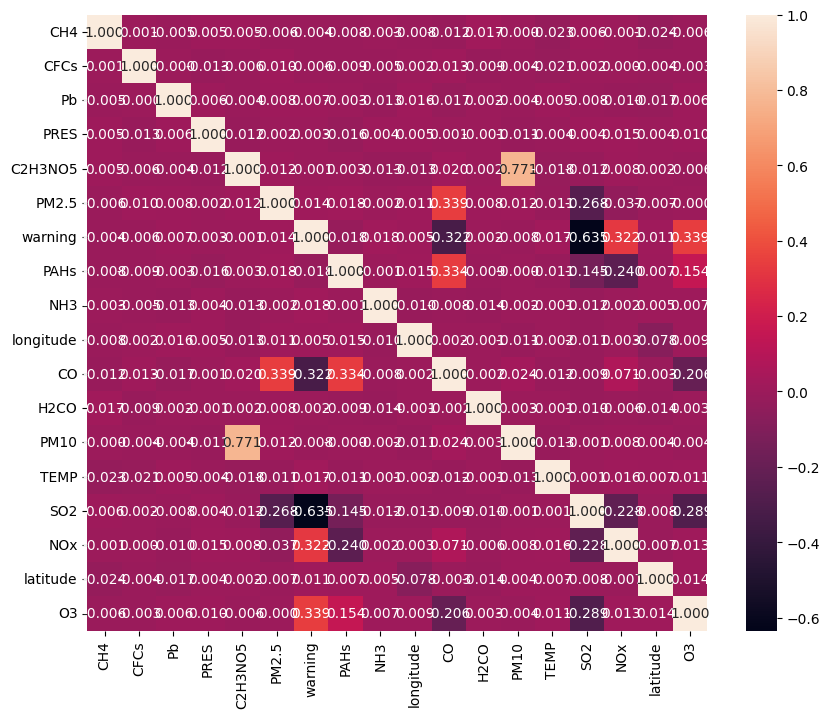

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(measurements.corr(), ax=ax, annot=True, fmt=".3f")

Vytvorenie heatmapy sa jasnejšiu vyzualizáciu.

In [14]:
measurements['warning'].corr(measurements['CO'])

0.5874160092842938

<AxesSubplot: xlabel='warning', ylabel='CO'>

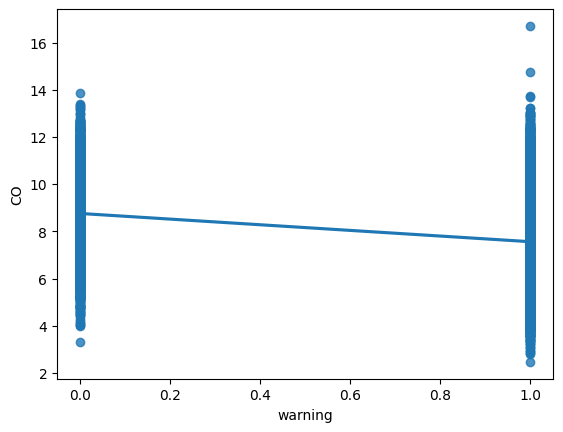

In [46]:
sns.regplot(x="warning", y="CO", data=measurements)

In [15]:
measurements['warning'].corr(measurements['Pb'])

0.599504819832254

<AxesSubplot: xlabel='warning', ylabel='Pb'>

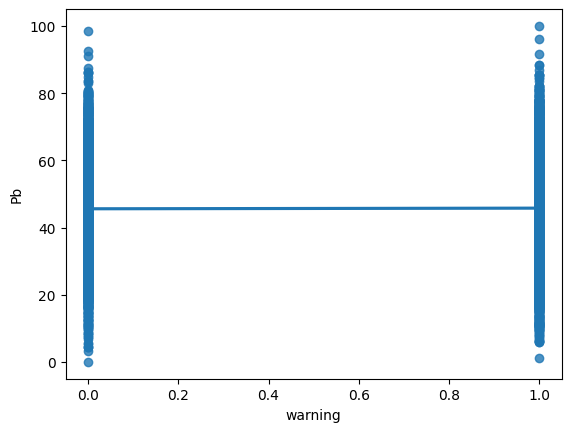

In [47]:
sns.regplot(x="warning", y="Pb", data=measurements)

Síce sme podľa Pearsonovej kolerácie našli atribúty ktore majú relatívne vysokú hodnotu korelácie, z grafov môžeme vidieť že ich korelácia je pravdepodobne iba náhoda.

<AxesSubplot: xlabel='O3', ylabel='TEMP'>

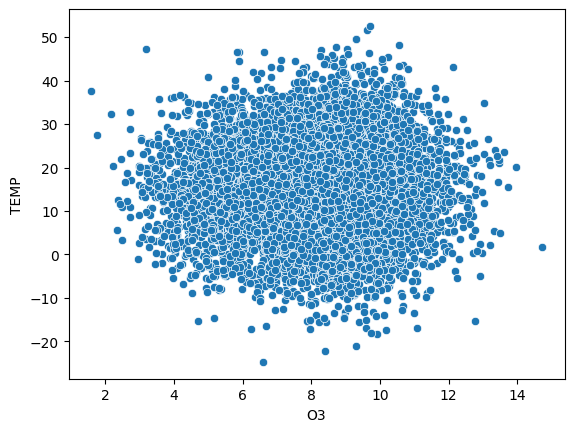

In [16]:
sns.scatterplot(data=measurements, x=measurements['O3'], y=measurements['TEMP'])

Podľa grafu môžeme povedať že teplota (TEMP) nemá koreláciu z atribútom O3 (ozón)

<AxesSubplot: xlabel='CO', ylabel='TEMP'>

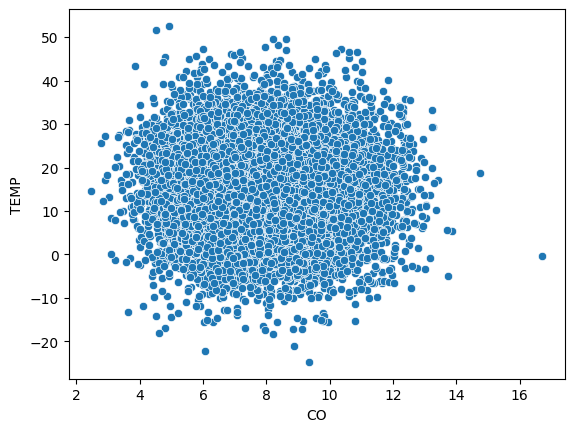

In [51]:
sns.scatterplot(data=measurements[measurements['CO']<20], x='CO', y='TEMP')

V tomto grafe môžeme tiež vidieť že atribút teplota (TEMP) nemá koreláciu z atribútom CO

#### Identifikácia závislosti medzi predikovanou premennou a ostatnými premennými

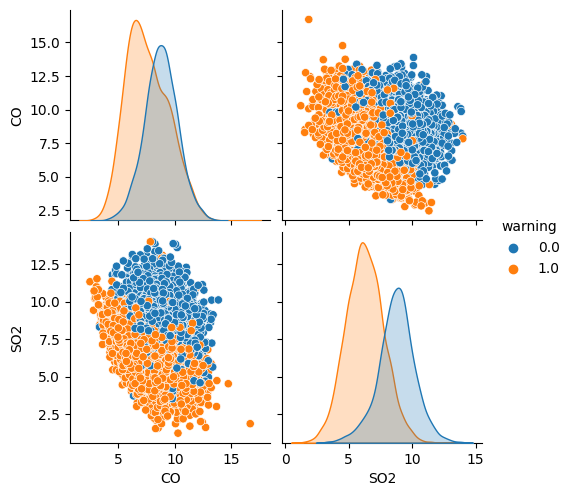

In [42]:
sns.pairplot(measurements, hue="warning", vars=['CO', 'SO2'])

Z plotov môžeme pozorovať že hodnota atribútu 'warning' má určitú pravideľnosť s hodnotami attribútov 'CO' a 'SO2'. Z najdených vzťahov si vytvoríme 2 hypotézy:

#### 1. Merania kvality ovzdušia v kritickom stave majú v priemere vyššiu hodnotu chemikálie "CO" ako merania kvality ovzdušia v normálnom stave

#### 2. Merania kvality ovzdušia v kritickom stave majú v priemere vyššiu hodnotu chemikálie "SO2" ako merania kvality ovzdušia v normálnom stave


# Štatistické testy pre formulované hypotézy

##  Hypotéza 1
Merania kvality ovzdušia v kritickom stave majú v priemere vyššiu hodnotu chemikálie "CO" ako merania kvality ovzdušia v normálnom stave

### Overenie distribucií dát

**Hypothesis**
- $H_0$ = data maju normalnu distribuciu 
- **Fail to Reject $H_0$**: Distribucie sa rovnaju 
- **Reject $H_0$**: Distribucie sa nerovnaju

In [44]:
shapiro_test_0 = shapiro(measurements[measurements['warning'] == 0])
shapiro_test_1 = shapiro(measurements[measurements['warning'] == 1])
shapiro_test = shapiro(measurements)
print(shapiro_test_0, shapiro_test_1)
print(shapiro_test)

alpha = 0.05
if shapiro_test_0.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')
if shapiro_test_1.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

ShapiroResult(statistic=0.3138049840927124, pvalue=0.0) ShapiroResult(statistic=0.3133555054664612, pvalue=0.0)
ShapiroResult(statistic=0.31353431940078735, pvalue=0.0)
Another distributions (reject H0)
Another distributions (reject H0)


C:\Users\matru\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##  Hypotéza 2
Merania kvality ovzdušia v kritickom stave majú v priemere vyššiu hodnotu chemikálie "SO2" ako merania kvality ovzdušia v normálnom stave

**Hypothesis**
- $H_0$ = nie su rozdiely medzi distribuciami
- **Fail to Reject $H_0$**: Distribucie sa rovnaju 
- **Reject $H_0$**: Distribucie sa nerovnaju

In [45]:
stat, p = mannwhitneyu(measurements)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)') 
else:
    print('Different distribution (reject H0)')

KeyError: 'y'